# ***Titanic_ML_models_Sai Chand Sunkara***

***importing the train data after EDA***

In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv("titanic_after_eda.csv")   #dataset after eda

In [3]:
train

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Addressing
0,0,1,0,3,0,-0.711931,1,0,-0.893460,0,0
1,1,2,1,1,1,1.458518,3,0,1.850152,1,1
2,2,3,1,3,1,-0.440625,0,0,-0.811040,0,2
3,3,4,1,1,1,0.169814,1,0,1.077488,0,1
4,4,5,0,3,0,0.169814,0,0,-0.796463,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,0,-0.372799,0,0,-0.339215,0,4
887,887,888,1,1,1,-0.915411,0,0,0.493895,0,2
888,888,889,0,3,1,-0.711931,1,2,0.245138,0,2
889,889,890,1,1,0,-0.440625,0,0,0.493895,1,0


# ***1.linear regression***

Linear regression performs the task to predict a dependent variable value (survived) based on independent variable (other features).Regression technique finds the linear relationship between (survived) and y(output).

In [4]:
train.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Addressing
count,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,0.352413,-2.113286e-16,0.771044,0.381594,-1.684648e-16,0.361392,0.735129
std,257.353842,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.203596,0.806057,1.000562e+00,0.635673,1.001959
min,0.000000,1.000000,0.000000,1.000000,0.000000,-2.175628e+00,0.000000,0.000000,-3.105027e+00,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,0.000000,-7.119313e-01,0.000000,0.000000,-8.127570e-01,0.000000,0.000000
50%,445.000000,446.000000,0.000000,3.000000,0.000000,3.416068e-02,0.000000,0.000000,-2.356455e-01,0.000000,0.000000
75%,667.500000,668.500000,1.000000,3.000000,1.000000,6.445996e-01,1.000000,0.000000,5.271686e-01,1.000000,2.000000
max,890.000000,891.000000,1.000000,3.000000,1.000000,3.222008e+00,5.000000,6.000000,1.855679e+00,2.000000,4.000000


In [5]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [7]:
X_train.shape

(623, 10)

In [8]:
X_test.shape

(268, 10)

In [9]:
y_train.shape

(623,)

In [10]:
y_test.shape

(268,)

In [11]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

linscore = linreg.score(X_test, y_test)

R-Squared for Train set: 0.416
R-Squared for test set: 0.390


***R-squared values are very low in linear regression so we dont use this model.***

# ***2.logistic regression***

As our target variable is either 0 or 1 logistic regression is more likely to fit the model.

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

logscore = logreg.score(X_test, y_test)

R-Squared for Train set: 0.809
R-Squared for test set: 0.791


***in logistic regression we get high r-squared values (79%).So, better to use this model.***

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/sai/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.68      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [15]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predictions)
confusion

array([[132,  22],
       [ 37,  77]])

In [16]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]

In [17]:
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[132  22]
 [ 37  77]]
TN:  132
FP:  22
FN:  37
TP:  77


# ***3.decision tree***

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtmodel.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtmodel.score(X_test, y_test)))

dtscore = dtmodel.score(X_test, y_test)

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


***this model even performed well with accuracy (79%) almost same as log.reg.***

In [19]:
predictions = dtmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       154
           1       0.81      0.65      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [20]:
confusion = confusion_matrix(y_test, predictions)
confusion

array([[137,  17],
       [ 40,  74]])

In [21]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[137  17]
 [ 40  74]]
TN:  137
FP:  17
FN:  40
TP:  74


# ***4.random forest***

Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state=0)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, n_jobs=2, random_state=0)

In [23]:
predictions = rfmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       154
           1       0.89      0.68      0.77       114

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.82       268



In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

rfscore = accuracy_score(y_test, predictions)

***even random forest has more accuracy score of 82%.So, this model can also be used.***

In [25]:
confusion = confusion_matrix(y_test, predictions)
confusion

array([[144,  10],
       [ 36,  78]])

In [26]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[144  10]
 [ 36  78]]
TN:  144
FP:  10
FN:  36
TP:  78


#  ***5.k-nearest neighbours classification***

In [27]:
from sklearn.neighbors import KNeighborsClassifier
error = []
accuracy = []

for i in range(1,40,2):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train, y_train)
    pred_i = knnmodel.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

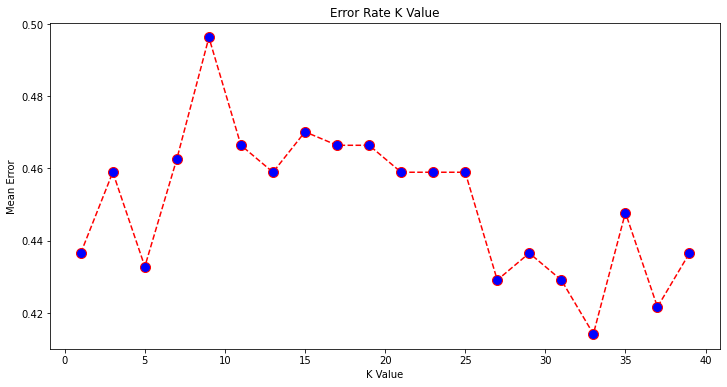

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

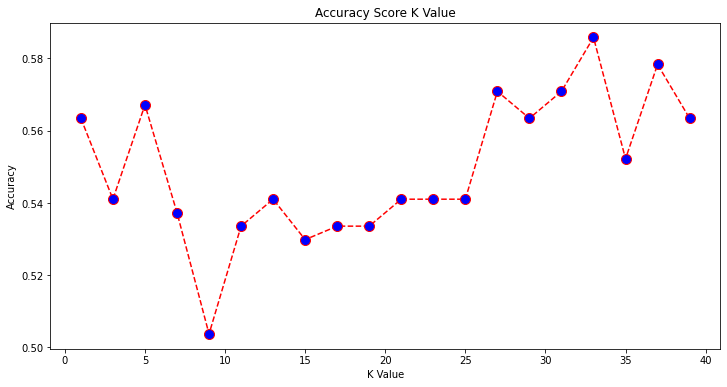

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [30]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
predictions = knnmodel.predict(X_test)

In [32]:
confusion = confusion_matrix(y_test, predictions)

In [33]:
print(accuracy_score(y_test, predictions))
knnscore = accuracy_score(y_test, predictions)

0.5671641791044776


***clearly this model doesnt perform well so, dont use.***

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       154
           1       0.49      0.32      0.38       114

    accuracy                           0.57       268
   macro avg       0.54      0.53      0.52       268
weighted avg       0.55      0.57      0.55       268



In [35]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[116  38]
 [ 78  36]]
TN:  116
FP:  38
FN:  78
TP:  36


#  ***6.KMeans Clustering***

In [36]:
from sklearn.cluster import KMeans
kmeansmodel = KMeans(n_clusters=1).fit(X_train, y_train)
pred = kmeansmodel.predict(X_test)

In [37]:
print(accuracy_score(y_test, pred))
kmscore = accuracy_score(y_test, pred)

0.5746268656716418


***this model doesnt perform well so dont use.***

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       154
           1       0.00      0.00      0.00       114

    accuracy                           0.57       268
   macro avg       0.29      0.50      0.36       268
weighted avg       0.33      0.57      0.42       268



/home/sai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
confusion = confusion_matrix(y_test, pred)

In [40]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[154   0]
 [114   0]]
TN:  154
FP:  0
FN:  114
TP:  0


#  ***choosing model***

***we have created all the models and we also have accuracy scores of them.So, now we just need to check all the models scores and choose the desired models to use.***

In [41]:
print("linear regression score = ",linscore)
print("logistic regression score = ",logscore)        # all are based on test accuracy scores 
print("decision tree score = ",dtscore)
print("random forest score = ",rfscore)
print("knn score = ",knnscore)
print("kmeans score = ",kmscore)

linear regression score =  0.3897661895129413
logistic regression score =  0.7910447761194029
decision tree score =  0.7873134328358209
random forest score =  0.8283582089552238
knn score =  0.5671641791044776
kmeans score =  0.5746268656716418


Models which can be used for this dataset are:

1.logistic regression model

2.decision tree model

3.random forest model

hyperparameter tuning can be made to increase scores of above models and maybe minmaxscaler also can be used for scaling the data in EDA.

# ***END.***